   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  

M

/tmp/ipython-input-3213922803.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=df, palette='pastel')


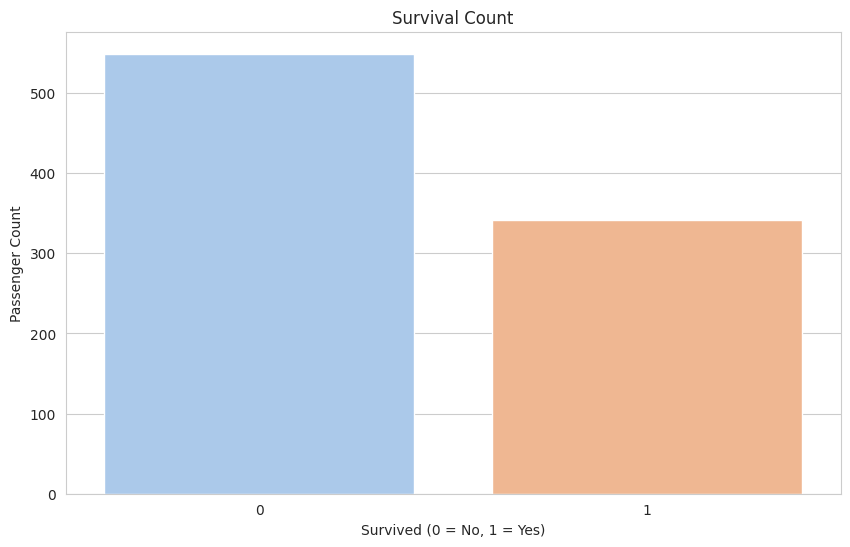

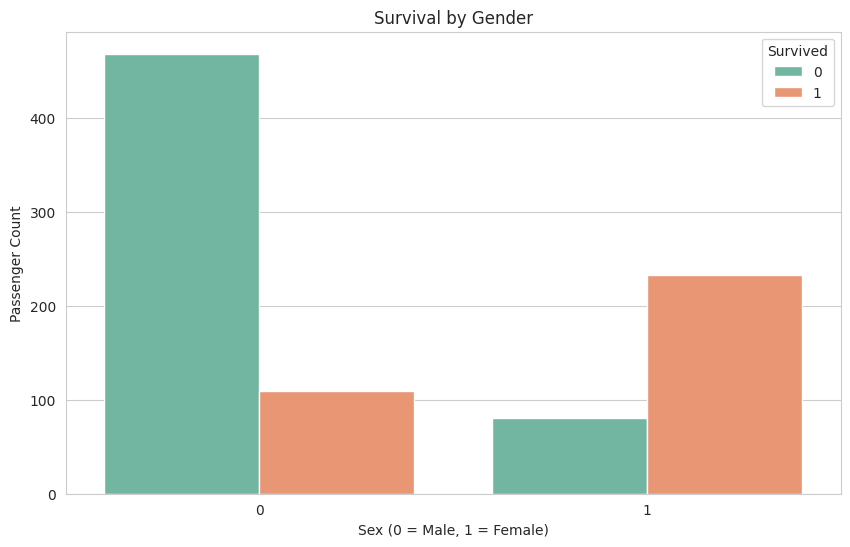

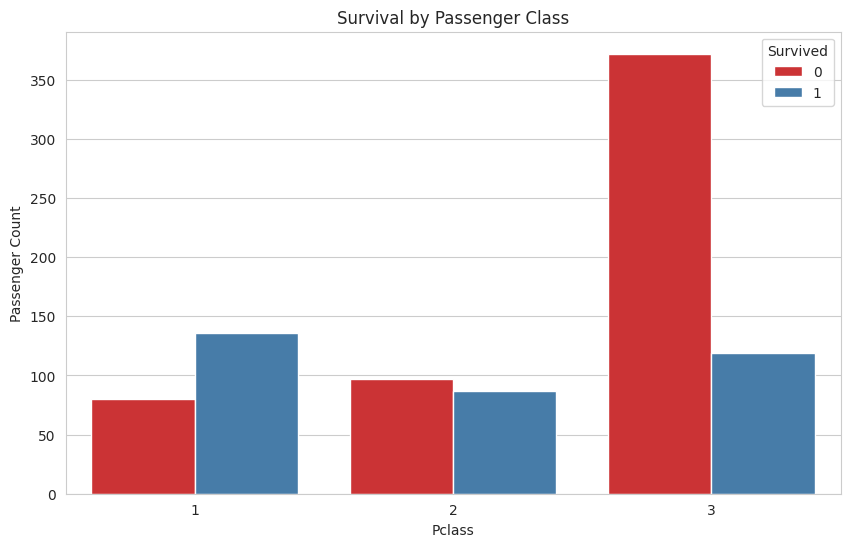

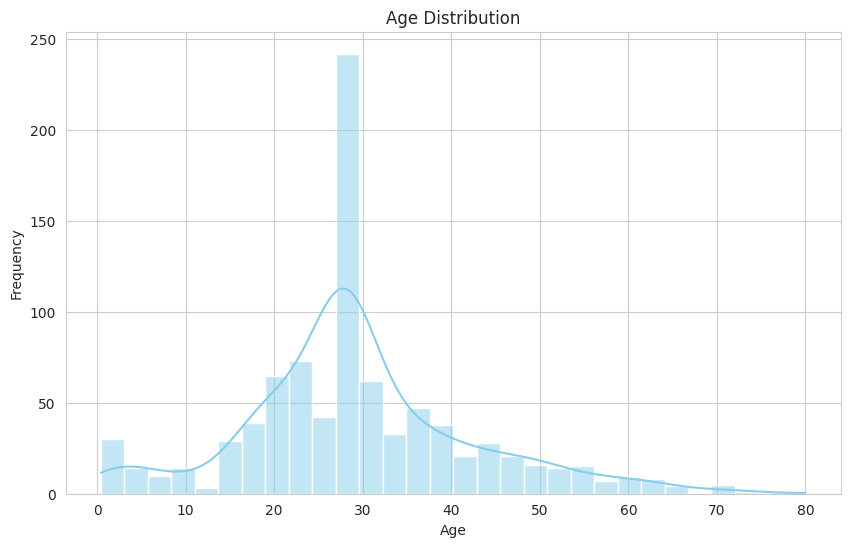

/tmp/ipython-input-3213922803.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Survived', y='Age', data=df, palette='pastel')


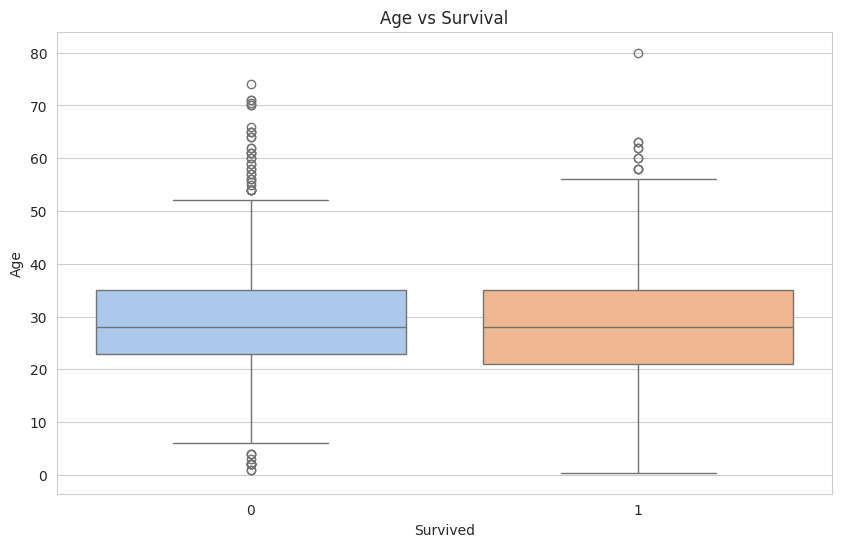

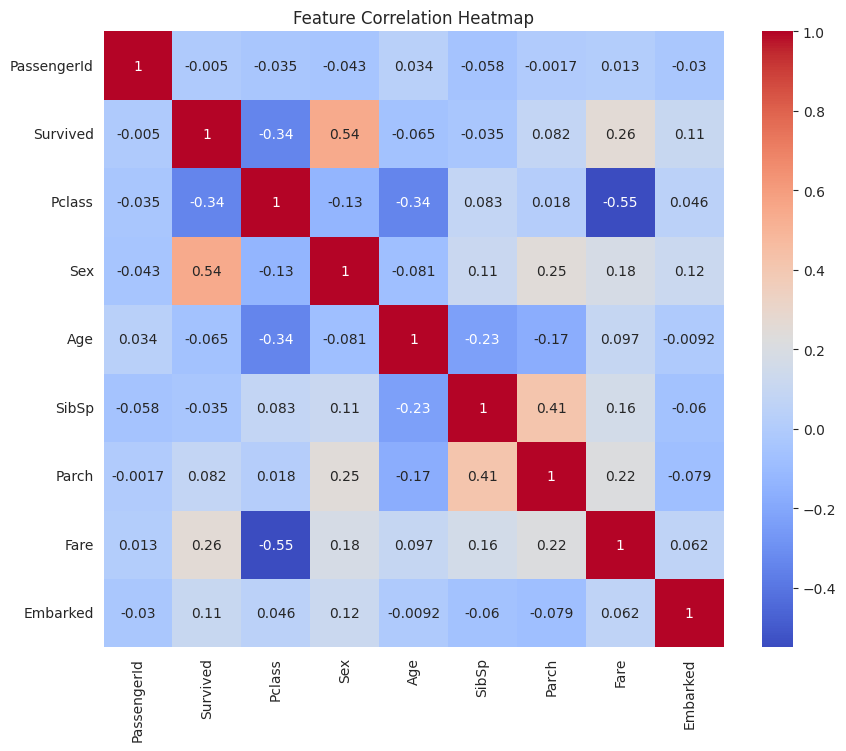

In [23]:
# Titanic EDA - Task 2
import os

# Create charts directory if it doesn't exist
os.makedirs("charts", exist_ok=True)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Style settings
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# 1. Load Data
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# 2. Preview and check missing values
print(df.head())
print("\nMissing values:\n", df.isnull().sum())

# 3. Clean missing values
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Drop Cabin (too many nulls)
df.drop('Cabin', axis=1, inplace=True)

# 4. Encode categorical (optional)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# 5. Exploratory Data Analysis (EDA)
# Survival count
sns.countplot(x='Survived', data=df, palette='pastel')
plt.title('Survival Count')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Passenger Count')
plt.savefig("charts/survival_count.png")
plt.show()

# Gender vs Survival
sns.countplot(x='Sex', hue='Survived', data=df, palette='Set2')
plt.title('Survival by Gender')
plt.xlabel('Sex (0 = Male, 1 = Female)')
plt.ylabel('Passenger Count')
plt.savefig("charts/survival_by_gender.png")
plt.show()

# Class vs Survival
sns.countplot(x='Pclass', hue='Survived', data=df, palette='Set1')
plt.title('Survival by Passenger Class')
plt.xlabel('Pclass')
plt.ylabel('Passenger Count')
plt.savefig("charts/survival_by_class.png")
plt.show()

# Age distribution
sns.histplot(df['Age'], kde=True, bins=30, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig("charts/age_distribution.png")
plt.show()

# Age vs Survival
sns.boxplot(x='Survived', y='Age', data=df, palette='pastel')
plt.title('Age vs Survival')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.savefig("charts/age_vs_survival.png")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
# Drop non-numeric columns before calculating correlation
sns.heatmap(df.drop(['Name', 'Ticket'], axis=1).corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.savefig("charts/correlation_heatmap.png")
plt.show()

In [24]:
df.to_csv("titanic_cleaned.csv", index=False)
